In [1]:
import torch
from tqdm import tqdm

import matplotlib.pyplot as plt

In [2]:
parabola_fn = lambda x: x ** 0.5
d_parabola_fn = torch.func.grad(parabola_fn)
circle_fn = lambda x: (1 - x ** 2) ** 0.5
d_circle_fn = torch.func.grad(circle_fn)

def get_perpendicular_fn(x1, f):
    df = torch.func.grad(f)
    def perpendicular_fn(x):
        return f(x1) - (1/df(x1)) * (x - x1)
    return perpendicular_fn

<Axes: >

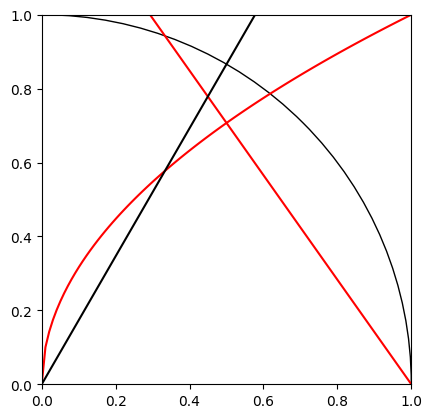

In [3]:
x = torch.linspace(0, 1, 100)

fig, ax = plt.subplots()
def base_plot(ax=ax):
    # draw circle of radius 1 at origin
    ax.add_patch(plt.Circle((0, 0), 1, fill=False))
    ax.plot(x, parabola_fn(x), color='r')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    return ax

def plot_all(x1, x2, ax):
    base_plot(ax=ax)
    ax.plot(x, get_perpendicular_fn(x1, parabola_fn)(x), color='r');
    ax.plot(x, get_perpendicular_fn(x2, circle_fn)(x), color='k');
    ax.set_aspect('equal')
    return ax
    
plot_all(torch.tensor(0.5), torch.tensor(0.5), ax=ax)

loss: 0.0000: 100%|██████████| 1000/1000 [00:03<00:00, 306.61it/s]


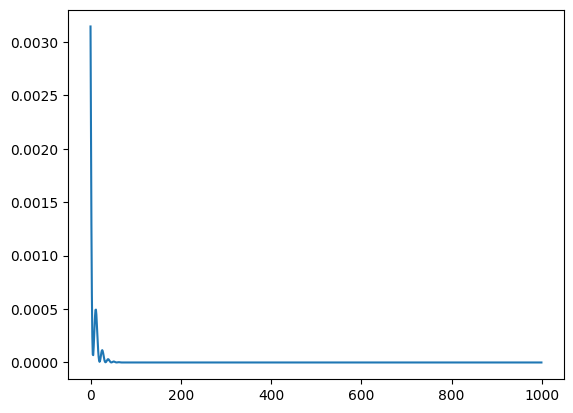

In [4]:
def loss_fn(x1, x2, verbose=False):
    c1 = parabola_fn(x1) + x1 / d_parabola_fn(x1)
    c2 = circle_fn(x2) + x2 / d_circle_fn(x2)
    m1 = -1/d_parabola_fn(x1)
    m2 = -1/d_circle_fn(x2)
    
    x_star = (c2 - c1) / (m1 - m2)
    y_star = m1 * x_star + c1
    if verbose:
        print(f"{x_star=}")
        print(f"{y_star=}")
    
    d1 = (x1 - x_star) ** 2 + (parabola_fn(x1) - y_star) ** 2
    d2 = (x2 - x_star) ** 2 + (circle_fn(x2) - y_star) ** 2
    d3 = x_star ** 2
    if verbose:
        print(f"{d1=}")
        print(f"{d2=}")
        print(f"{d3=}")
        return {"x_star": x_star, "y_star": y_star, "d1": d1, "d2": d2, "d3": d3, "loss": d1 + d2 + d3}
    else:
        return (d1 - d2) ** 2 + (d1 - d3) ** 2 + (d2 - d3) ** 2

x1 = torch.tensor(0.4, requires_grad=True)
x2 = torch.tensor(0.3, requires_grad=True)

optimizer = torch.optim.Adam([x1, x2], lr=0.01)

pbar = tqdm(range(1000))
losses = []
for i in pbar:
    optimizer.zero_grad()
    loss = loss_fn(x1, x2)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    pbar.set_description(f'loss: {loss.item():.4f}')
    
plt.plot(losses)

x_star=tensor(0.2138)
y_star=tensor(0.7565)
d1=tensor(0.0457)
d2=tensor(0.0457)
d3=tensor(0.0457)
radius: r=0.2138418257


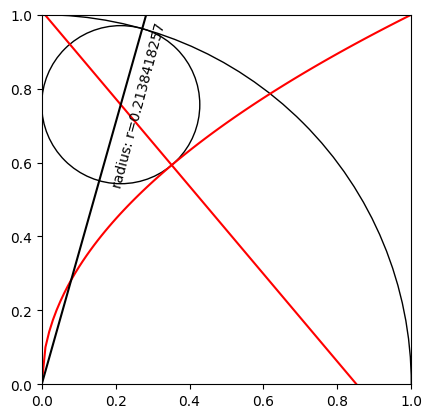

In [15]:
fig, ax = plt.subplots()

with torch.no_grad():
    res_dict = loss_fn(x1, x2, verbose=True)
    r = res_dict["x_star"]
    x_star = torch.tensor(r.item())
    y_star = res_dict["y_star"]
    ax = plot_all(x1, x2, ax=ax)
    ax.add_patch(plt.Circle((x_star, y_star), r, fill=False))
    
ax.text(x_star+0.05, y_star, f"radius: r={r:.10f}", fontsize=10, horizontalalignment='center', verticalalignment='center', rotation=75)
print(f"radius: r={r:.10f}")